In [1]:
# imports
import pandas as pd
import numpy as np
from myutils.utility import readJson, getSensorData, interpolate1D, getSensorInterpolatedData, find_event
from matplotlib import pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# This is going to take some time ~1-5 min
fields = getSensorData()

Note: sensors 8799 and 8827 are repeated in the json file!
The complete pandas frame has shape  (13984608, 10)
sensor: 6561  1st obs: 2019-01-01 00:01:07  last: 2019-12-31 23:59:37 median dt:  2  min, total obs: 236287
sensor: 8745  1st obs: 2019-01-01 00:01:06  last: 2019-12-31 23:59:47 median dt:  2  min, total obs: 188253
sensor: 8765  1st obs: 2019-01-01 00:01:30  last: 2019-12-31 23:59:52 median dt:  2  min, total obs: 192953
sensor: 8769  1st obs: 2019-01-01 00:00:52  last: 2019-12-31 23:58:53 median dt:  2  min, total obs: 184062
sensor: 8773  1st obs: 2019-01-20 02:37:25  last: 2019-12-31 23:59:00 median dt:  2  min, total obs: 139201
sensor: 8775 did not record any observation.
sensor: 8777  1st obs: 2019-01-01 00:00:46  last: 2019-12-31 23:58:07 median dt:  2  min, total obs: 189325
sensor: 8779 did not record any observation.
sensor: 8781  1st obs: 2019-01-01 00:00:43  last: 2019-10-13 12:10:43 median dt:  2  min, total obs: 137546
sensor: 8783  1st obs: 2019-01-03 06:35:16 

sensor: 9825  1st obs: 2019-01-01 00:01:51  last: 2019-12-31 23:58:31 median dt:  2  min, total obs: 145450
sensor: 10045  1st obs: 2019-01-01 00:00:11  last: 2019-12-31 23:59:55 median dt:  2  min, total obs: 204151
sensor: 10739 did not record any observation.
sensor: 10741  1st obs: 2019-01-05 09:48:27  last: 2019-12-03 09:33:40 median dt:  2  min, total obs: 178224
sensor: 11201 did not record any observation.
sensor: 11529  1st obs: 2019-01-01 00:01:54  last: 2019-12-31 23:57:37 median dt:  2  min, total obs: 202105
sensor: 12030  1st obs: 2019-01-01 00:00:34  last: 2019-12-31 23:58:29 median dt:  2  min, total obs: 203502
sensor: 12183  1st obs: 2019-01-01 00:01:18  last: 2019-12-02 23:59:31 median dt:  2  min, total obs: 186477
sensor: 12505  1st obs: 2019-01-01 00:00:06  last: 2019-12-31 23:58:23 median dt:  2  min, total obs: 184795
sensor: 12554  1st obs: 2019-01-01 00:02:14  last: 2019-12-31 23:57:46 median dt:  2  min, total obs: 206207
sensor: 12609 did not record any obse

In [3]:
# Get all the variable names
varname = list(pd.read_csv('LEUVENAIRfulldump2019.csv', skiprows=0, nrows = 0, usecols = None).columns)
print('All variable names are :', varname)

All variable names are : ['DATEUTC', 'LAT', 'LON', 'SDS011ID', 'PM2.5', 'PM10', 'DHTID', 'TEMPERATURE', 'HUMIDITY', 'OBSID']


Extracting data over duration  1 days 00:00:00  starting at  2019-04-01 00:00:00
Sampling resolution =  1  minute


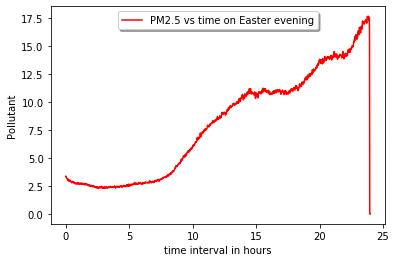

In [4]:
# Visible peak in PM2.5 at Easter
X, Y = getSensorInterpolatedData(fields,tstart='2019-04-01 00:00:00',tstop='2019-04-02 00:00:00',fid=4)
plt.plot(np.squeeze(X/(60)),np.squeeze(np.nanmedian(Y,axis=0)), 'r', label = 'PM2.5 vs time on Easter evening')
left, right = plt.xlim()
plt.xlim(left,right)
plt.xlabel('time interval in hours')
plt.ylabel('Pollutant')
legend = plt.legend(loc='upper center', shadow=True)

In [5]:
# Visible peak in PM2.5 at Easter
temp = np.squeeze(np.nanmedian(Y,axis=0))
print(np.min(temp),np.max(temp),np.std(temp),np.mean(temp))

0.0 17.673333333333332 4.680902807538587 7.973625141304534


In [7]:
eventdict, fullmatrix = find_event(fields, startday = 1, stopday = 28, startmonth = 1, stopmonth = 13)

Extracting data over duration  1 days 00:00:00  starting at  2019-01-01 00:00:00
Sampling resolution =  1  minute
start time =  2019-01-01  00:00:00  stop time =  2019-01-02  00:00:00
Min =  0.0 Max =  22.343333333333334 Standard deviation =  6.063397430411185 Mean  =  9.763732105475647
Extracting data over duration  1 days 00:00:00  starting at  2019-01-02 00:00:00
Sampling resolution =  1  minute
start time =  2019-01-02  00:00:00  stop time =  2019-01-03  00:00:00
Min =  0.0 Max =  6.086666666666667 Standard deviation =  0.9907029151157118 Mean  =  3.6948217269995007
Extracting data over duration  1 days 00:00:00  starting at  2019-01-03 00:00:00
Sampling resolution =  1  minute
start time =  2019-01-03  00:00:00  stop time =  2019-01-04  00:00:00
Min =  0.0 Max =  10.923333333333332 Standard deviation =  2.4168167973468773 Mean  =  4.943112125662634
Extracting data over duration  1 days 00:00:00  starting at  2019-01-04 00:00:00
Sampling resolution =  1  minute
start time =  2019-0

start time =  2019-02-03  00:00:00  stop time =  2019-02-04  00:00:00
Min =  0.0 Max =  41.239999999999995 Standard deviation =  12.716089496978327 Mean  =  15.805501844768454
Extracting data over duration  1 days 00:00:00  starting at  2019-02-04 00:00:00
Sampling resolution =  1  minute
start time =  2019-02-04  00:00:00  stop time =  2019-02-05  00:00:00
Min =  0.0 Max =  12.1 Standard deviation =  1.9550939248835277 Mean  =  5.839576218948805
Extracting data over duration  1 days 00:00:00  starting at  2019-02-05 00:00:00
Sampling resolution =  1  minute
start time =  2019-02-05  00:00:00  stop time =  2019-02-06  00:00:00
Min =  0.0 Max =  16.676666666666666 Standard deviation =  3.130083324440853 Mean  =  8.366664449798545
Extracting data over duration  1 days 00:00:00  starting at  2019-02-06 00:00:00
Sampling resolution =  1  minute
start time =  2019-02-06  00:00:00  stop time =  2019-02-07  00:00:00
Min =  0.0 Max =  11.895166666666666 Standard deviation =  2.468392009560364 

start time =  2019-03-05  00:00:00  stop time =  2019-03-06  00:00:00
Min =  0.0 Max =  7.6 Standard deviation =  1.462153895814927 Mean  =  2.2616449511190826
Extracting data over duration  1 days 00:00:00  starting at  2019-03-06 00:00:00
Sampling resolution =  1  minute
start time =  2019-03-06  00:00:00  stop time =  2019-03-07  00:00:00
Min =  0.0 Max =  6.365 Standard deviation =  1.4032327936365234 Mean  =  3.3316599089918246
Extracting data over duration  1 days 00:00:00  starting at  2019-03-07 00:00:00
Sampling resolution =  1  minute
start time =  2019-03-07  00:00:00  stop time =  2019-03-08  00:00:00
Min =  0.0 Max =  4.27 Standard deviation =  0.5775940714180963 Mean  =  1.7015373562875444
Extracting data over duration  1 days 00:00:00  starting at  2019-03-08 00:00:00
Sampling resolution =  1  minute
start time =  2019-03-08  00:00:00  stop time =  2019-03-09  00:00:00
Min =  0.0 Max =  4.75 Standard deviation =  0.7940160003275981 Mean  =  2.623401822039443
Extracting d

C:\Users\u0108376\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
C:\Users\u0108376\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:609: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


start time =  2019-03-18  00:00:00  stop time =  2019-03-19  00:00:00
Min =  0.0 Max =  7.5 Standard deviation =  1.6202749571750763 Mean  =  3.014878865656381
Extracting data over duration  1 days 00:00:00  starting at  2019-03-19 00:00:00
Sampling resolution =  1  minute
start time =  2019-03-19  00:00:00  stop time =  2019-03-20  00:00:00
Min =  0.0 Max =  11.418333333333333 Standard deviation =  2.3618331563646047 Mean  =  5.553533910986776
Extracting data over duration  1 days 00:00:00  starting at  2019-03-20 00:00:00
Sampling resolution =  1  minute
start time =  2019-03-20  00:00:00  stop time =  2019-03-21  00:00:00
Min =  0.0 Max =  14.6 Standard deviation =  3.6714552904859445 Mean  =  6.1644036311941885
Extracting data over duration  1 days 00:00:00  starting at  2019-03-21 00:00:00
Sampling resolution =  1  minute
start time =  2019-03-21  00:00:00  stop time =  2019-03-22  00:00:00
Min =  0.0 Max =  38.07 Standard deviation =  7.915469559758193 Mean  =  19.60084406044455


start time =  2019-04-20  00:00:00  stop time =  2019-04-21  00:00:00
Min =  0.0 Max =  10.135 Standard deviation =  1.9460143585260377 Mean  =  6.601756560233957
Extracting data over duration  1 days 00:00:00  starting at  2019-04-21 00:00:00
Sampling resolution =  1  minute
start time =  2019-04-21  00:00:00  stop time =  2019-04-22  00:00:00
Min =  0.0 Max =  13.83 Standard deviation =  2.7498015442008934 Mean  =  9.414739038714039
Extracting data over duration  1 days 00:00:00  starting at  2019-04-22 00:00:00
Sampling resolution =  1  minute
start time =  2019-04-22  00:00:00  stop time =  2019-04-23  00:00:00
Min =  0.0 Max =  15.223333333333333 Standard deviation =  4.307927016458491 Mean  =  6.189333684384534
Extracting data over duration  1 days 00:00:00  starting at  2019-04-23 00:00:00
Sampling resolution =  1  minute
start time =  2019-04-23  00:00:00  stop time =  2019-04-24  00:00:00
Min =  0.0 Max =  7.140000000000001 Standard deviation =  1.471750419336153 Mean  =  4.36

start time =  2019-05-23  00:00:00  stop time =  2019-05-24  00:00:00
Min =  0.0 Max =  5.398333333333333 Standard deviation =  0.79980074777303 Mean  =  3.0391963913690474
Extracting data over duration  1 days 00:00:00  starting at  2019-05-24 00:00:00
Sampling resolution =  1  minute
start time =  2019-05-24  00:00:00  stop time =  2019-05-25  00:00:00
Min =  0.0 Max =  8.559166666666666 Standard deviation =  1.8664161116929694 Mean  =  4.765046306818182
Extracting data over duration  1 days 00:00:00  starting at  2019-05-25 00:00:00
Sampling resolution =  1  minute
start time =  2019-05-25  00:00:00  stop time =  2019-05-26  00:00:00
Min =  0.0 Max =  18.013333333333335 Standard deviation =  2.9692974317849883 Mean  =  9.507004514314406
Extracting data over duration  1 days 00:00:00  starting at  2019-05-26 00:00:00
Sampling resolution =  1  minute
start time =  2019-05-26  00:00:00  stop time =  2019-05-27  00:00:00
Min =  0.0 Max =  21.807499999999997 Standard deviation =  6.13075

start time =  2019-06-26  00:00:00  stop time =  2019-06-27  00:00:00
Min =  0.0 Max =  62.64333333333333 Standard deviation =  20.584286907358436 Mean  =  29.672280969026684
Extracting data over duration  1 days 00:00:00  starting at  2019-06-27 00:00:00
Sampling resolution =  1  minute
start time =  2019-06-27  00:00:00  stop time =  2019-06-28  00:00:00
Min =  0.0 Max =  10.1 Standard deviation =  2.1343655528492746 Mean  =  4.130969717465628
Extracting data over duration  1 days 00:00:00  starting at  2019-07-01 00:00:00
Sampling resolution =  1  minute
start time =  2019-07-01  00:00:00  stop time =  2019-07-02  00:00:00
Min =  0.0 Max =  4.37 Standard deviation =  0.8281987073818522 Mean  =  2.4819596888871285
Extracting data over duration  1 days 00:00:00  starting at  2019-07-02 00:00:00
Sampling resolution =  1  minute
start time =  2019-07-02  00:00:00  stop time =  2019-07-03  00:00:00
Min =  0.0 Max =  4.015000000000001 Standard deviation =  0.7604254841911514 Mean  =  1.82

start time =  2019-08-02  00:00:00  stop time =  2019-08-03  00:00:00
Min =  0.0 Max =  11.5225 Standard deviation =  2.1987087169963346 Mean  =  4.776896006944445
Extracting data over duration  1 days 00:00:00  starting at  2019-08-03 00:00:00
Sampling resolution =  1  minute
start time =  2019-08-03  00:00:00  stop time =  2019-08-04  00:00:00
Min =  0.0 Max =  9.27 Standard deviation =  2.488105694057293 Mean  =  4.138664525832374
Extracting data over duration  1 days 00:00:00  starting at  2019-08-04 00:00:00
Sampling resolution =  1  minute
start time =  2019-08-04  00:00:00  stop time =  2019-08-05  00:00:00
Min =  0.0 Max =  10.78 Standard deviation =  2.0405800286250306 Mean  =  4.9768912085667605
Extracting data over duration  1 days 00:00:00  starting at  2019-08-05 00:00:00
Sampling resolution =  1  minute
start time =  2019-08-05  00:00:00  stop time =  2019-08-06  00:00:00
Min =  0.0 Max =  7.8 Standard deviation =  1.689259484126464 Mean  =  3.016232696759259
Extracting d

start time =  2019-09-05  00:00:00  stop time =  2019-09-06  00:00:00
Min =  0.0 Max =  3.0 Standard deviation =  0.529048749785263 Mean  =  2.0467809606481477
Extracting data over duration  1 days 00:00:00  starting at  2019-09-06 00:00:00
Sampling resolution =  1  minute
start time =  2019-09-06  00:00:00  stop time =  2019-09-07  00:00:00
Min =  0.0 Max =  4.12 Standard deviation =  0.6427584653832416 Mean  =  2.2205746527777777
Extracting data over duration  1 days 00:00:00  starting at  2019-09-07 00:00:00
Sampling resolution =  1  minute
start time =  2019-09-07  00:00:00  stop time =  2019-09-08  00:00:00
Min =  0.0 Max =  6.766666666666667 Standard deviation =  1.9654149867006596 Mean  =  2.9358700580887493
Extracting data over duration  1 days 00:00:00  starting at  2019-09-08 00:00:00
Sampling resolution =  1  minute
start time =  2019-09-08  00:00:00  stop time =  2019-09-09  00:00:00
Min =  0.0 Max =  2.8566666666666665 Standard deviation =  0.5849842888131528 Mean  =  1.69

start time =  2019-10-08  00:00:00  stop time =  2019-10-09  00:00:00
Min =  0.0 Max =  4.81 Standard deviation =  1.184061763462212 Mean  =  2.59901434857617
Extracting data over duration  1 days 00:00:00  starting at  2019-10-09 00:00:00
Sampling resolution =  1  minute
start time =  2019-10-09  00:00:00  stop time =  2019-10-10  00:00:00
Min =  0.0 Max =  4.5675 Standard deviation =  1.160258789452518 Mean  =  2.1201002700617284
Extracting data over duration  1 days 00:00:00  starting at  2019-10-10 00:00:00
Sampling resolution =  1  minute
start time =  2019-10-10  00:00:00  stop time =  2019-10-11  00:00:00
Min =  0.0 Max =  2.7566666666666664 Standard deviation =  0.36578718664092796 Mean  =  1.8020923018634265
Extracting data over duration  1 days 00:00:00  starting at  2019-10-11 00:00:00
Sampling resolution =  1  minute
start time =  2019-10-11  00:00:00  stop time =  2019-10-12  00:00:00
Min =  0.0 Max =  3.798333333333334 Standard deviation =  0.6065100864702787 Mean  =  1.8

start time =  2019-11-11  00:00:00  stop time =  2019-11-12  00:00:00
Min =  0.0 Max =  11.4 Standard deviation =  2.976377851880559 Mean  =  3.98472885602595
Extracting data over duration  1 days 00:00:00  starting at  2019-11-12 00:00:00
Sampling resolution =  1  minute
start time =  2019-11-12  00:00:00  stop time =  2019-11-13  00:00:00
Min =  0.0 Max =  2.83 Standard deviation =  0.5703935877116084 Mean  =  1.5832635254522187
Extracting data over duration  1 days 00:00:00  starting at  2019-11-13 00:00:00
Sampling resolution =  1  minute
start time =  2019-11-13  00:00:00  stop time =  2019-11-14  00:00:00
Min =  0.0 Max =  10.241666666666667 Standard deviation =  2.001176082437065 Mean  =  5.4711976382925664
Extracting data over duration  1 days 00:00:00  starting at  2019-11-14 00:00:00
Sampling resolution =  1  minute
start time =  2019-11-14  00:00:00  stop time =  2019-11-15  00:00:00
Min =  0.0 Max =  6.381666666666667 Standard deviation =  1.3947339389657152 Mean  =  2.4563

start time =  2019-12-14  00:00:00  stop time =  2019-12-15  00:00:00
Min =  0.0 Max =  5.823333333333333 Standard deviation =  0.9765843836301579 Mean  =  2.709922605614579
Extracting data over duration  1 days 00:00:00  starting at  2019-12-15 00:00:00
Sampling resolution =  1  minute
start time =  2019-12-15  00:00:00  stop time =  2019-12-16  00:00:00
Min =  0.0 Max =  3.965 Standard deviation =  0.8370010482809288 Mean  =  2.401206695966071
Extracting data over duration  1 days 00:00:00  starting at  2019-12-16 00:00:00
Sampling resolution =  1  minute
start time =  2019-12-16  00:00:00  stop time =  2019-12-17  00:00:00
Min =  0.0 Max =  12.863333333333333 Standard deviation =  3.3812001985990805 Mean  =  4.453709679427326
Extracting data over duration  1 days 00:00:00  starting at  2019-12-17 00:00:00
Sampling resolution =  1  minute
start time =  2019-12-17  00:00:00  stop time =  2019-12-18  00:00:00
Min =  0.0 Max =  8.850000000000001 Standard deviation =  1.7254990956489586 

In [8]:
eventdict.keys()

dict_keys(['1-1', '2-1', '3-1', '4-1', '5-1', '6-1', '7-1', '8-1', '9-1', '10-1', '11-1', '12-1', '13-1', '14-1', '15-1', '16-1', '17-1', '18-1', '19-1', '20-1', '21-1', '22-1', '23-1', '24-1', '25-1', '26-1', '27-1', '1-2', '2-2', '3-2', '4-2', '5-2', '6-2', '7-2', '8-2', '9-2', '10-2', '11-2', '12-2', '13-2', '14-2', '15-2', '16-2', '17-2', '18-2', '19-2', '20-2', '21-2', '22-2', '23-2', '24-2', '25-2', '26-2', '27-2', '1-3', '2-3', '3-3', '4-3', '5-3', '6-3', '7-3', '8-3', '9-3', '10-3', '11-3', '12-3', '13-3', '14-3', '15-3', '16-3', '17-3', '18-3', '19-3', '20-3', '21-3', '22-3', '23-3', '24-3', '25-3', '26-3', '27-3', '1-4', '2-4', '3-4', '4-4', '5-4', '6-4', '7-4', '8-4', '9-4', '10-4', '11-4', '12-4', '13-4', '14-4', '15-4', '16-4', '17-4', '18-4', '19-4', '20-4', '21-4', '22-4', '23-4', '24-4', '25-4', '26-4', '27-4', '1-5', '2-5', '3-5', '4-5', '5-5', '6-5', '7-5', '8-5', '9-5', '10-5', '11-5', '12-5', '13-5', '14-5', '15-5', '16-5', '17-5', '18-5', '19-5', '20-5', '21-5', '2

In [10]:
fullmatrix.shape

(324, 7)